In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import  metrics as skm

In [2]:
scaled_test_features= pd.read_csv('scaled_test_features.csv')
true_labels_ts= pd.read_csv('true_labels_ts.csv')
features_ts_df= pd.read_csv('features_ts_df.csv')

In [3]:
NS = tf.keras.models.load_model('Models Projeto A/NS')
NG = tf.keras.models.load_model('Models Projeto A/NG')
MG = tf.keras.models.load_model('Models Projeto A/MG')
MS = tf.keras.models.load_model('Models Projeto A/MS')

In [4]:
def model_metrics(y_true, y_pred, name, y_prob= (), prints= False, accuracy= False,
                  precision= False, f1= False, hamming_loss= False,
                  cohen_kappa= False, matthews_corr= False):
    if accuracy:
        acc= skm.accuracy_score(y_true, y_pred)
    else:
        acc= 0
    if precision:
        prec= skm.precision_score(y_true, y_pred, average= 'weighted')
    else:
        prec= 0
    if f1:
        f1score= skm.f1_score(y_true, y_pred, average= 'weighted')
    else:
        f1score= 0
    if hamming_loss:
        h_loss= skm.hamming_loss(y_true, y_pred)
    else:
        h_loss= 0
    if cohen_kappa:
        ckappa= skm.cohen_kappa_score(y_true, y_pred)
    else:
        ckappa= 0
    if matthews_corr:
        mcc= skm.matthews_corrcoef(y_true, y_pred)
    else:
        mcc= 0
    if prints:
        if accuracy:
            print('The accuracy score is:', acc)
        if precision:
            print('The precision score is:', prec)
        if f1:
            print('The F1 score is:', f1score)
        if hamming_loss:
            print('The Hamming loss is:', h_loss)
        if cohen_kappa:
            print('Cohens kappa score is:', ckappa)
        if matthews_corr:
            print('Matthews Correlation Coefficient:', mcc)
    return [acc, prec, f1score, h_loss, ckappa, mcc, name]

In [5]:
activity_id_dict= {0:1, 1:2, 2:3, 3:4, 4:7, 5:17}

7695/7695 [==============================] - 14s 2ms/step
The accuracy score is: 0.9955040938332576
The precision score is: 0.9955106084321816
The F1 score is: 0.9955058866658208
The Hamming loss is: 0.004495906166742478
Cohens kappa score is: 0.9945901766080262
Matthews Correlation Coefficient: 0.994590735949411


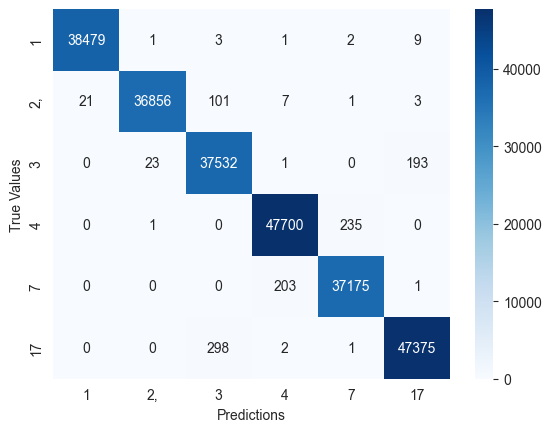

In [6]:
NS_predicts= NS.predict(features_ts_df)
NS_predicts = np.argmax(NS_predicts, axis=1)
NS_predicts= pd.DataFrame(NS_predicts)[0].replace(activity_id_dict)
#NS_prob= NS.predict_proba(features_ts_df)
ns_cnf_mat= skm.confusion_matrix(true_labels_ts, NS_predicts)

#plt.figure(figsize= (10,10))
categories= ['1', '2,', '3', '4', '7', '17']
sns.heatmap(ns_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NS_metrics= model_metrics(true_labels_ts, NS_predicts, 'NS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

7695/7695 [==============================] - 18s 2ms/step
The accuracy score is: 0.9958817986873741
The precision score is: 0.9959064717609718
The F1 score is: 0.995884192936169
The Hamming loss is: 0.004118201312625902
Cohens kappa score is: 0.995044972834438
Matthews Correlation Coefficient: 0.9950490113136545


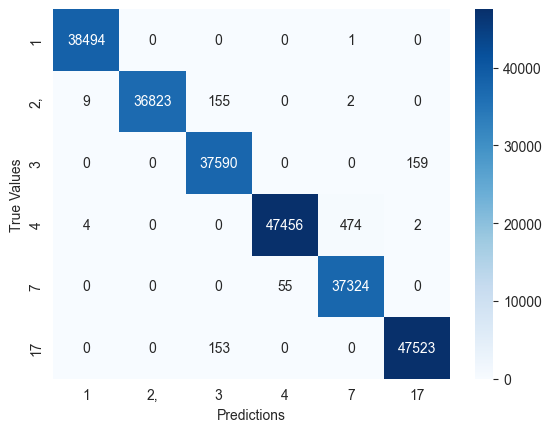

In [7]:
NG_predicts= NG.predict(features_ts_df)
NG_predicts = np.argmax(NG_predicts, axis=1)
NG_predicts= pd.DataFrame(NG_predicts)[0].replace(activity_id_dict)

ng_cnf_mat= skm.confusion_matrix(true_labels_ts, NG_predicts)

#plt.figure(figsize= (10,10))
categories= ['1', '2,', '3', '4', '7', '17']
sns.heatmap(ng_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NG_metrics= model_metrics(true_labels_ts, NG_predicts, 'NG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

7695/7695 [==============================] - 18s 2ms/step
The accuracy score is: 0.9972748391708363
The precision score is: 0.997274463429939
The F1 score is: 0.9972732762573527
The Hamming loss is: 0.002725160829163688
Cohens kappa score is: 0.9967207257606351
Matthews Correlation Coefficient: 0.9967212685524038


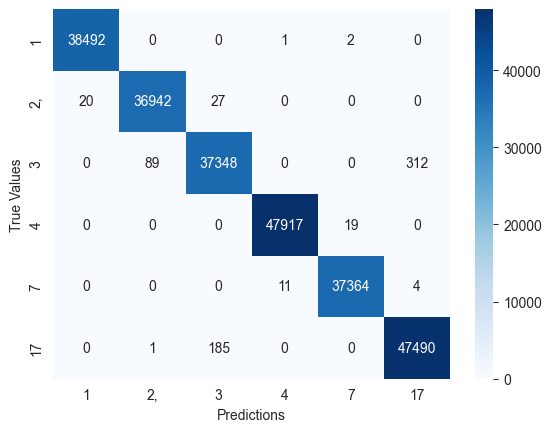

In [19]:
MG_predicts= MG.predict(scaled_test_features)
MG_predicts = np.argmax(MG_predicts, axis=1)
MG_predicts= pd.DataFrame(MG_predicts)[0].replace(activity_id_dict)

mg_cnf_mat= skm.confusion_matrix(true_labels_ts, MG_predicts)

#plt.figure(figsize= (10,10))
categories= ['1', '2,', '3', '4', '7', '17']
sns.heatmap(mg_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MG_metrics= model_metrics(true_labels_ts, MG_predicts, 'MG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                           matthews_corr= True)

7695/7695 [==============================] - 16s 2ms/step
The accuracy score is: 0.9983714016505296
The precision score is: 0.9983748713948907
The F1 score is: 0.9983720116059759
The Hamming loss is: 0.001628598349470401
Cohens kappa score is: 0.9980403438199389
Matthews Correlation Coefficient: 0.9980408011661438


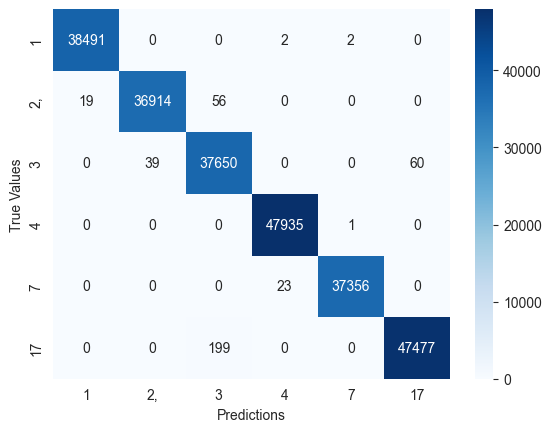

In [18]:
MS_predicts= MS.predict(scaled_test_features)
MS_predicts = np.argmax(MS_predicts, axis=1)
MS_predicts= pd.DataFrame(MS_predicts)[0].replace(activity_id_dict)

ms_cnf_mat= skm.confusion_matrix(true_labels_ts, MS_predicts)

#plt.figure(figsize= (10,10))
categories= ['1', '2,', '3', '4', '7', '17']
sns.heatmap(ms_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MS_metrics= model_metrics(true_labels_ts, MS_predicts, 'MS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

In [20]:
metrics= np.array([NS_metrics,NG_metrics, MG_metrics, MS_metrics])
metric_df= pd.DataFrame(data= metrics, columns= ['Accuracy', 'Precision', 'F1 Score', 'Hamming loss',
                                                 'Cohens Kappa', 'Matthews Correlation', 'Model Name']
                        ,index= ['NS', 'NG', 'MG', 'MS']).drop('Hamming loss', axis= 1)
hl= np.array([[NS_metrics[i] for i in [3,6]], [NG_metrics[i] for i in [3,6]],
             [MG_metrics[i] for i in [3,6]], [MS_metrics[i] for i in [3,6]]])
hl_df= pd.DataFrame(data= hl, columns= ['Hamming loss', 'Model Name'])

In [21]:
metrics_exp= pd.melt(frame = metric_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
metrics_exp= metrics_exp.astype({'value':'float'})
hl_exp= pd.melt(frame = hl_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
hl_exp= hl_exp.astype({'value':'float'})

(0.97, 1.0)

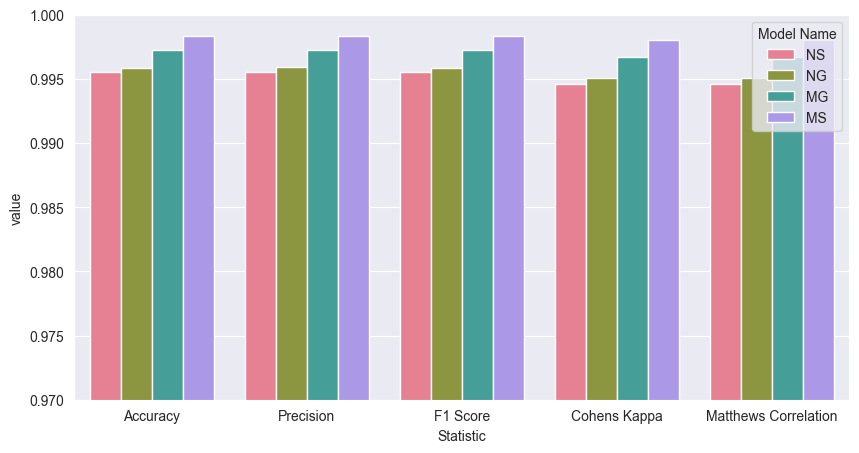

In [22]:
plt.figure(figsize= (10,5))
sns.barplot(data = metrics_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0.97, 1])

(0.0, 0.02)

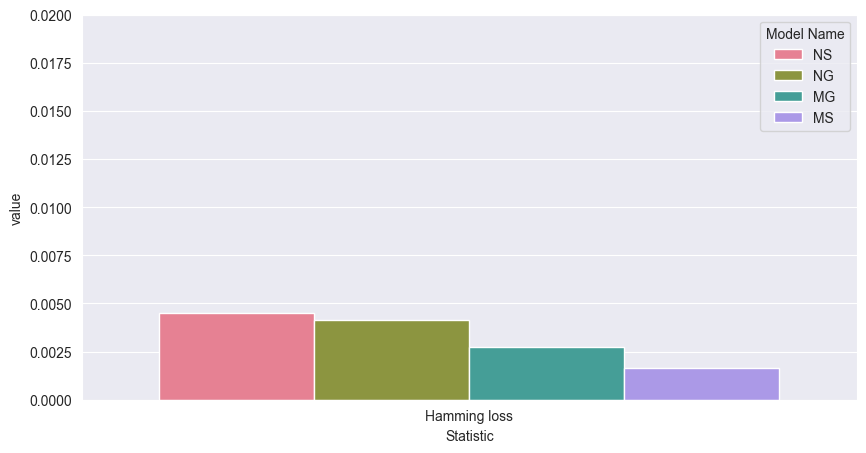

In [23]:
plt.figure(figsize= (10,5))
sns.barplot(data = hl_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0, 0.02])